<a href="https://colab.research.google.com/github/AFFANAHMED-17/MLExperiments/blob/main/MLLABEXP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8636 - loss: 0.4816 - val_accuracy: 0.9560 - val_loss: 0.1541
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9617 - loss: 0.1359 - val_accuracy: 0.9653 - val_loss: 0.1176
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9733 - loss: 0.0912 - val_accuracy: 0.9711 - val_loss: 0.0973
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9820 - loss: 0.0627 - val_accuracy: 0.9714 - val_loss: 0.0950
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9862 - loss: 0.0479 - val_accuracy: 0.9722 - val_loss: 0.0910
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9889 - loss: 0.0376 - val_accuracy: 0.9740 - val_loss: 0.0896
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9919 - loss: 0.0283 - val_accuracy: 0.9747 - val_loss: 0.0872
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9933 - loss: 0.02

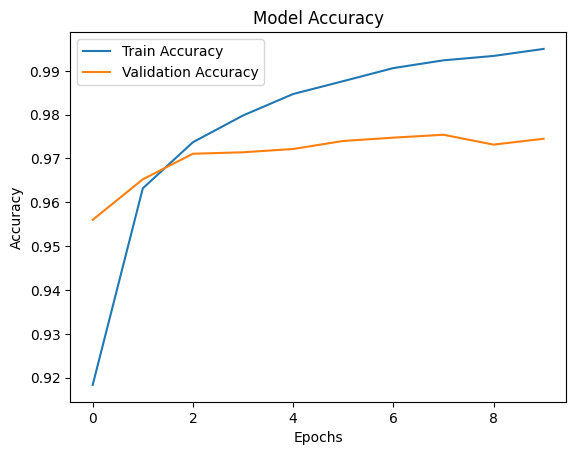

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


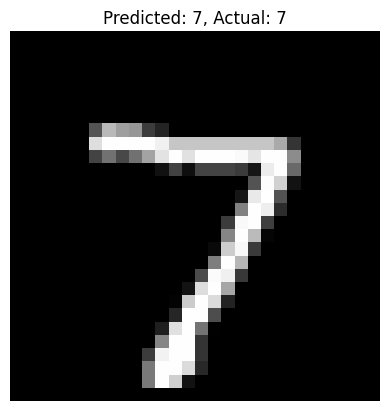

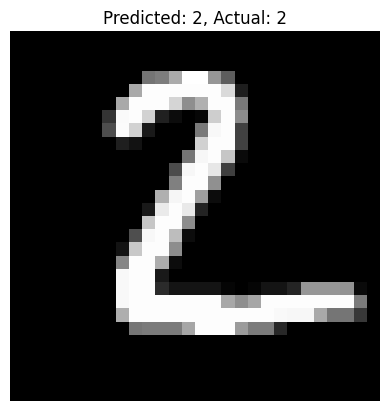

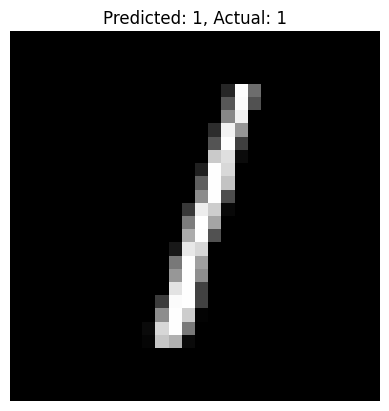

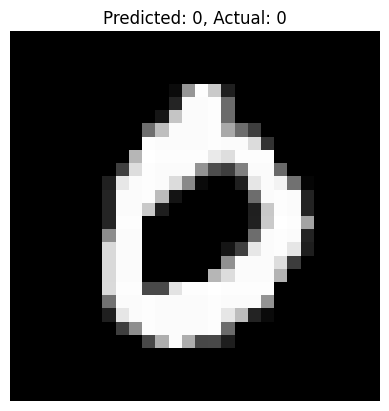

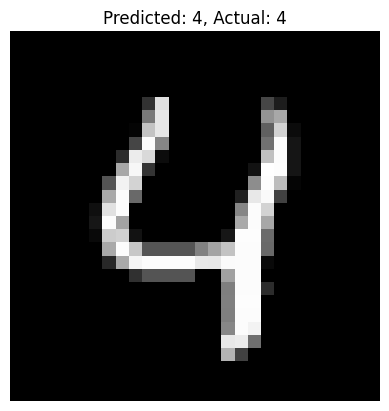

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.0  # Normalize to [0, 1]
X_test = X_test.astype('float32') / 255.0    # Normalize to [0, 1]
y_train = to_categorical(y_train, 10)         # One-hot encoding
y_test = to_categorical(y_test, 10)           # One-hot encoding
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 images
model.add(Dense(128, activation='relu'))   # Hidden layer with 128 neurons
model.add(Dense(10, activation='softmax'))  # Output layer with 10 neurons (digits 0-9)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
for i in range(5):
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Predicted: {predicted_classes[i]}, Actual: {np.argmax(y_test[i])}')
    plt.axis('off')
    plt.show()
